In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2)

In [48]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

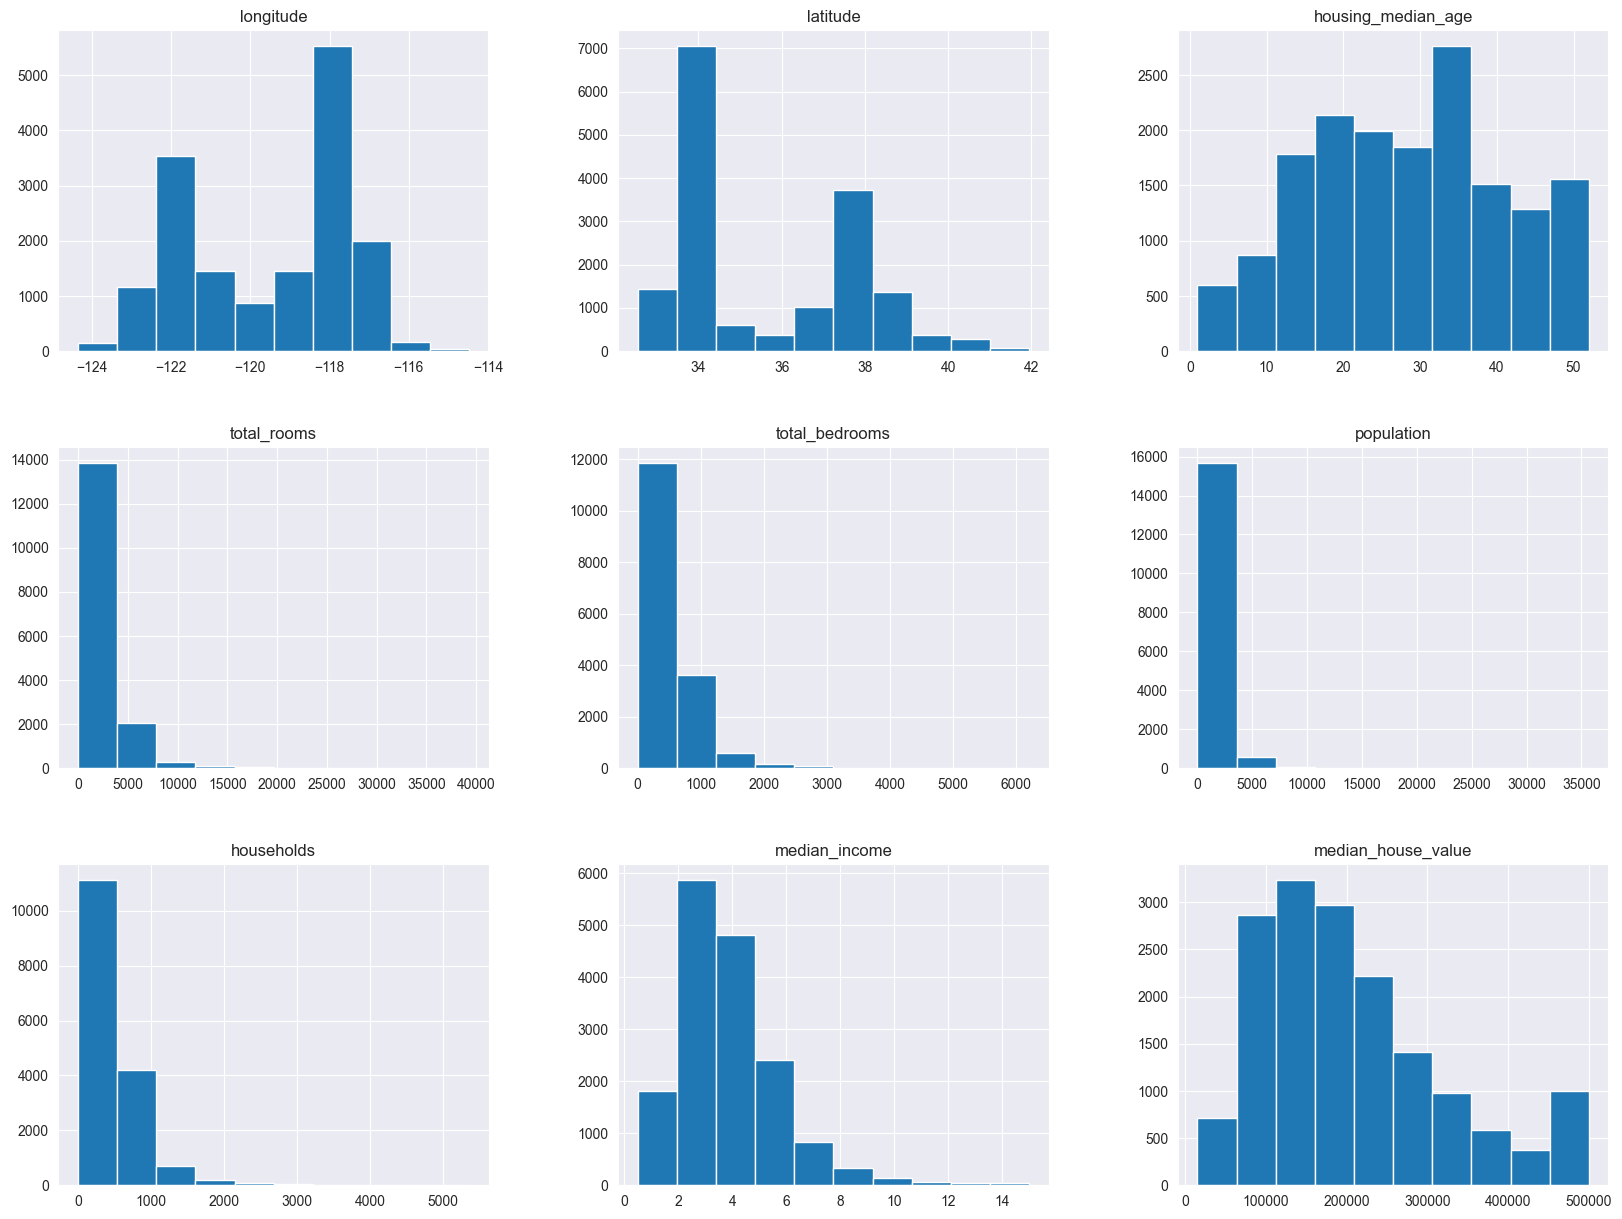

In [51]:
train_data.hist(figsize=(20,15))

In [52]:
numeric_data = train_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

In [53]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924344,-0.107249,0.043302,0.066171,0.098660,0.053965,-0.006891,-0.036037
latitude,-0.924344,1.000000,0.009774,-0.035452,-0.064503,-0.107122,-0.070036,-0.088162,-0.153132
housing_median_age,-0.107249,0.009774,1.000000,-0.361409,-0.321432,-0.298671,-0.304711,-0.120452,0.105141
total_rooms,0.043302,-0.035452,-0.361409,1.000000,0.930586,0.858887,0.920880,0.205186,0.138544
total_bedrooms,0.066171,-0.064503,-0.321432,0.930586,1.000000,0.876618,0.979857,0.000130,0.055022
population,0.098660,-0.107122,-0.298671,0.858887,0.876618,1.000000,0.906366,0.014663,-0.021090
households,0.053965,-0.070036,-0.304711,0.920880,0.979857,0.906366,1.000000,0.023388,0.070681
median_income,-0.006891,-0.088162,-0.120452,0.205186,0.000130,0.014663,0.023388,1.000000,0.687867
median_house_value,-0.036037,-0.153132,0.105141,0.138544,0.055022,-0.021090,0.070681,0.687867,1.000000


<Axes: >

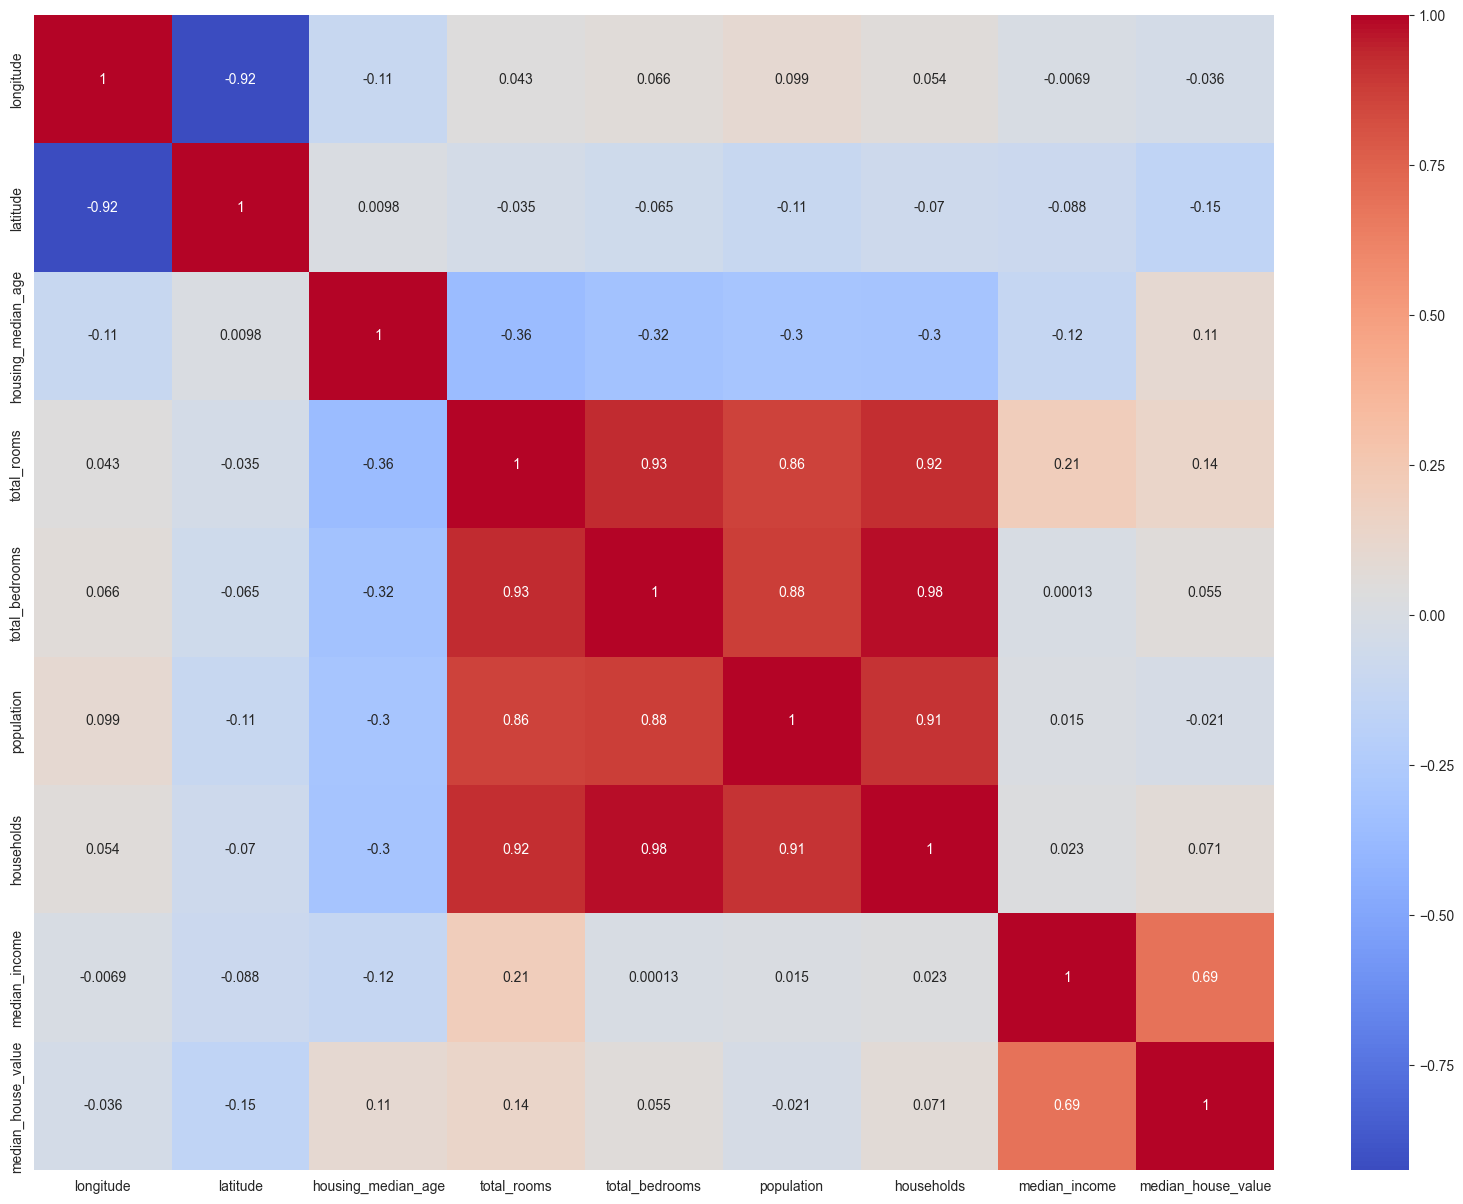

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [55]:
numeric_data['total_rooms'] = np.log(numeric_data['total_rooms']+1)
numeric_data['total_bedrooms'] = np.log(numeric_data['total_bedrooms']+1)
numeric_data['population'] = np.log(numeric_data['population']+1)
numeric_data['households'] = np.log(numeric_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

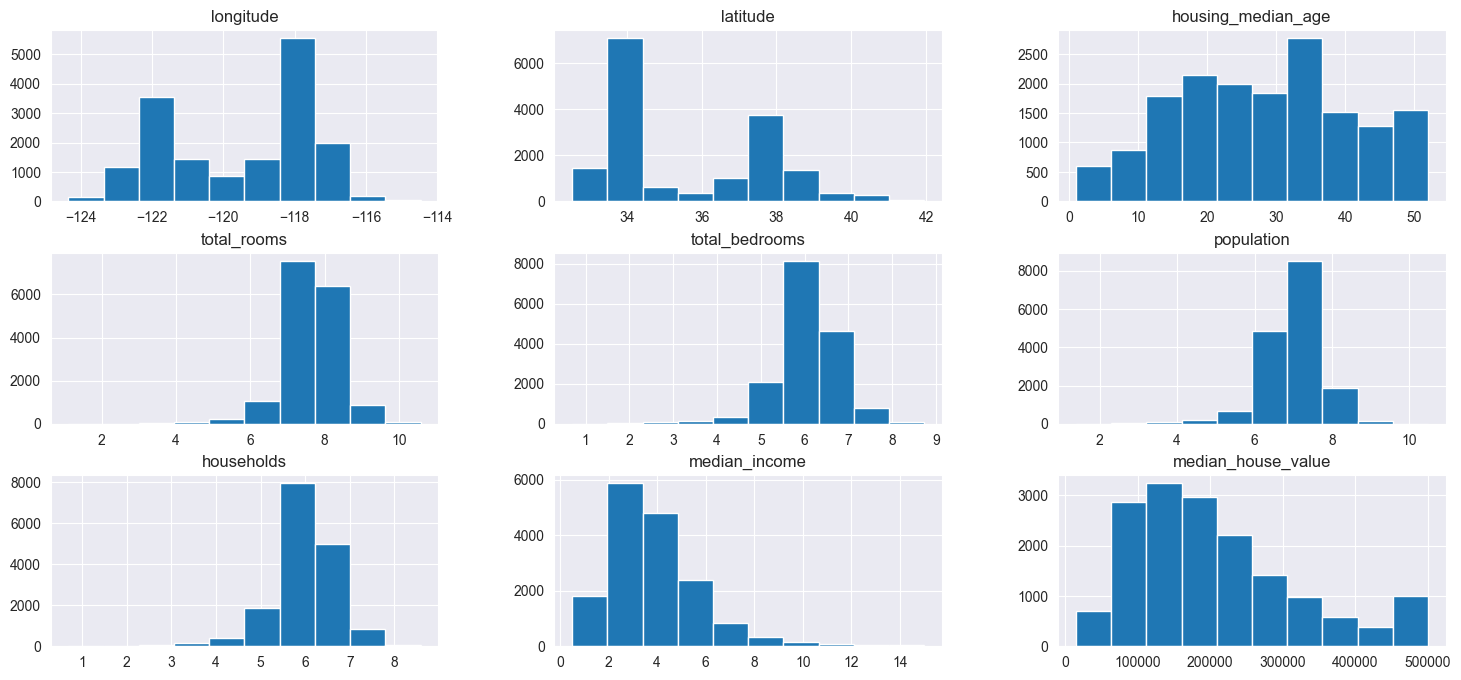

In [56]:
numeric_data.hist(figsize=(18,8))

In [57]:
numeric_data = numeric_data.join(pd.get_dummies(train_data['ocean_proximity']))

In [58]:
numeric_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5439,-118.44,34.01,42.0,7.631432,5.983936,6.811244,5.976351,6.0804,420000.0,True,False,False,False,False
12493,-121.47,38.57,52.0,6.084499,4.644391,5.176150,4.605170,3.0217,200000.0,False,True,False,False,False
15087,-116.93,32.82,26.0,8.326033,6.572283,7.507141,6.577861,4.2586,171000.0,True,False,False,False,False
20323,-119.12,34.23,35.0,7.615298,6.318968,7.720018,6.257668,2.4643,182000.0,False,False,False,False,True
631,-122.17,37.72,5.0,7.434257,5.988961,6.703188,5.796058,3.6630,158300.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,-120.46,37.51,22.0,7.902857,6.210600,7.267525,5.991465,2.9000,83100.0,False,True,False,False,False
8241,-118.19,33.77,31.0,7.445418,6.539586,6.996681,6.343880,1.0714,150000.0,False,False,False,False,True
5921,-117.71,34.15,17.0,9.782223,7.771067,8.944550,7.746301,7.9068,349100.0,False,True,False,False,False
11573,-118.00,33.77,24.0,7.189168,5.590987,6.533789,5.579730,3.4327,192800.0,True,False,False,False,False


<Axes: >

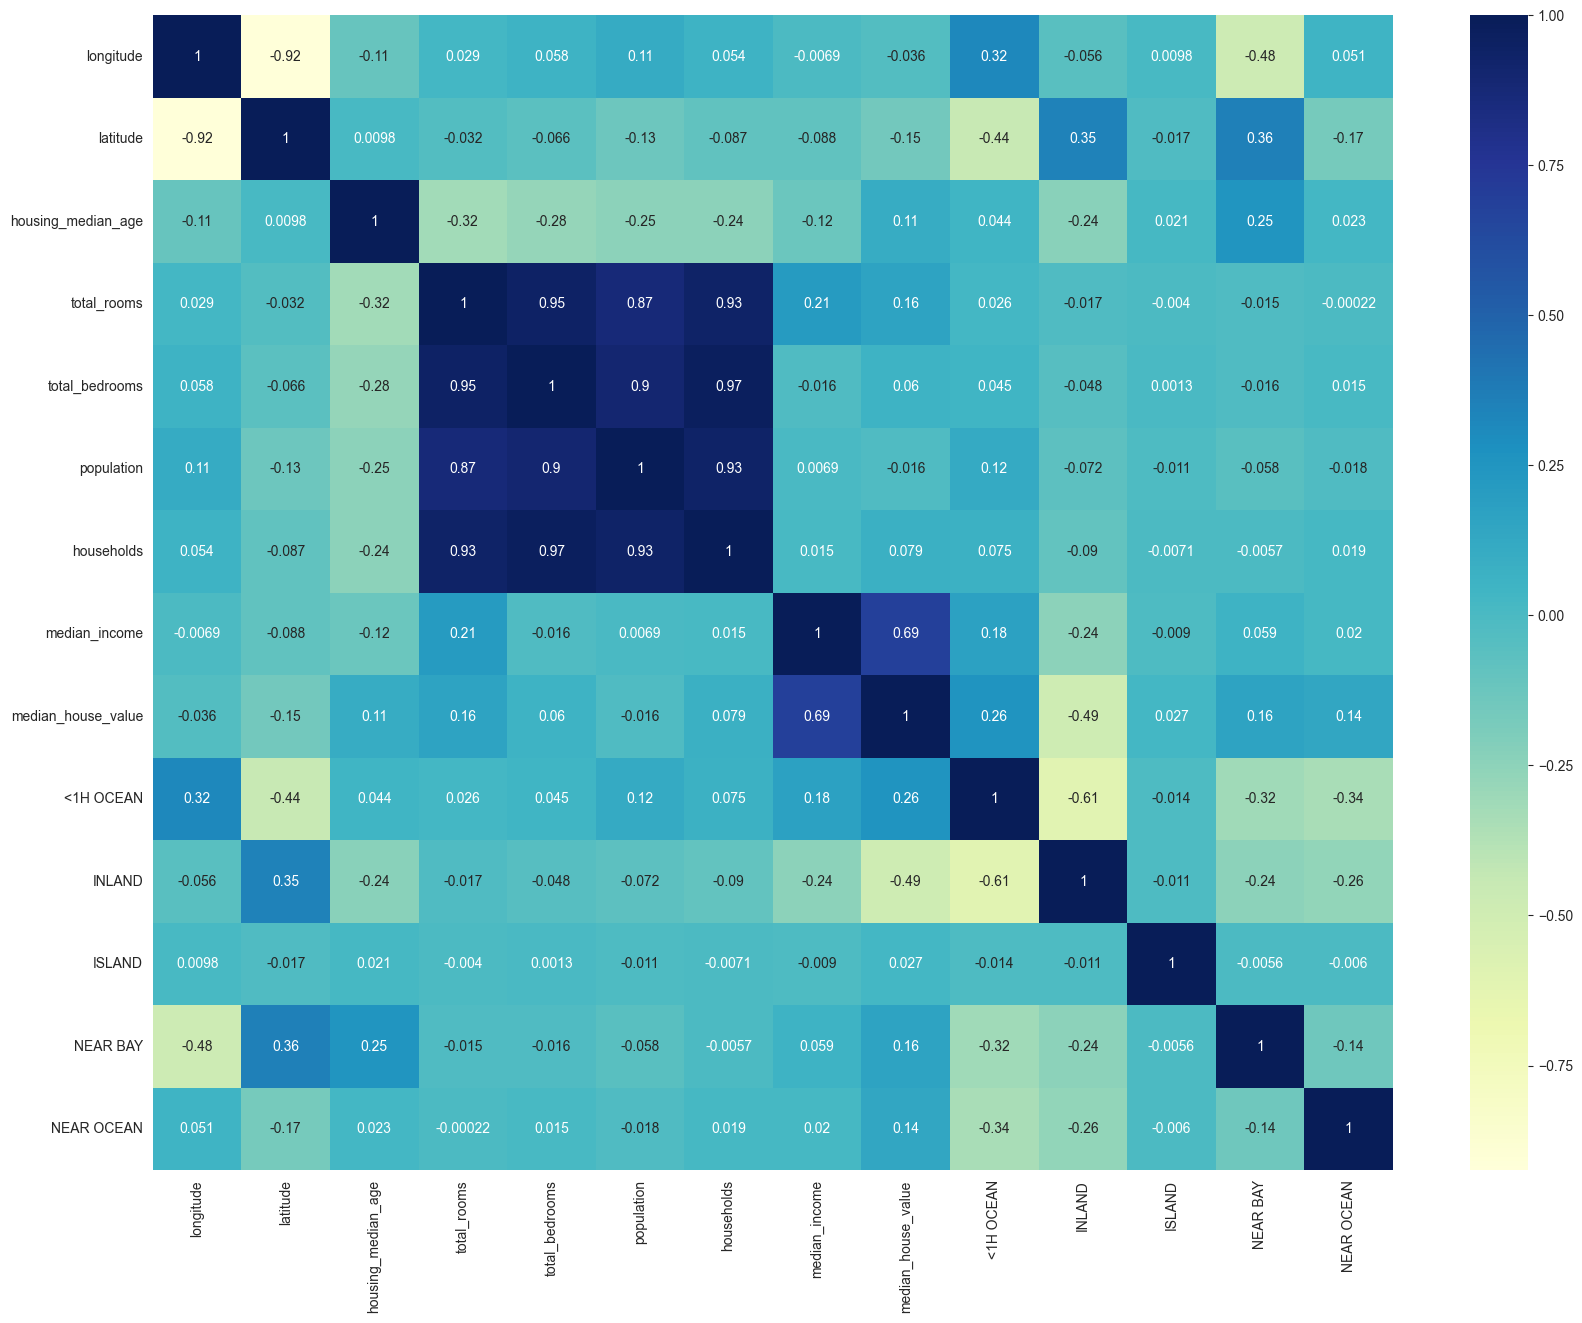

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

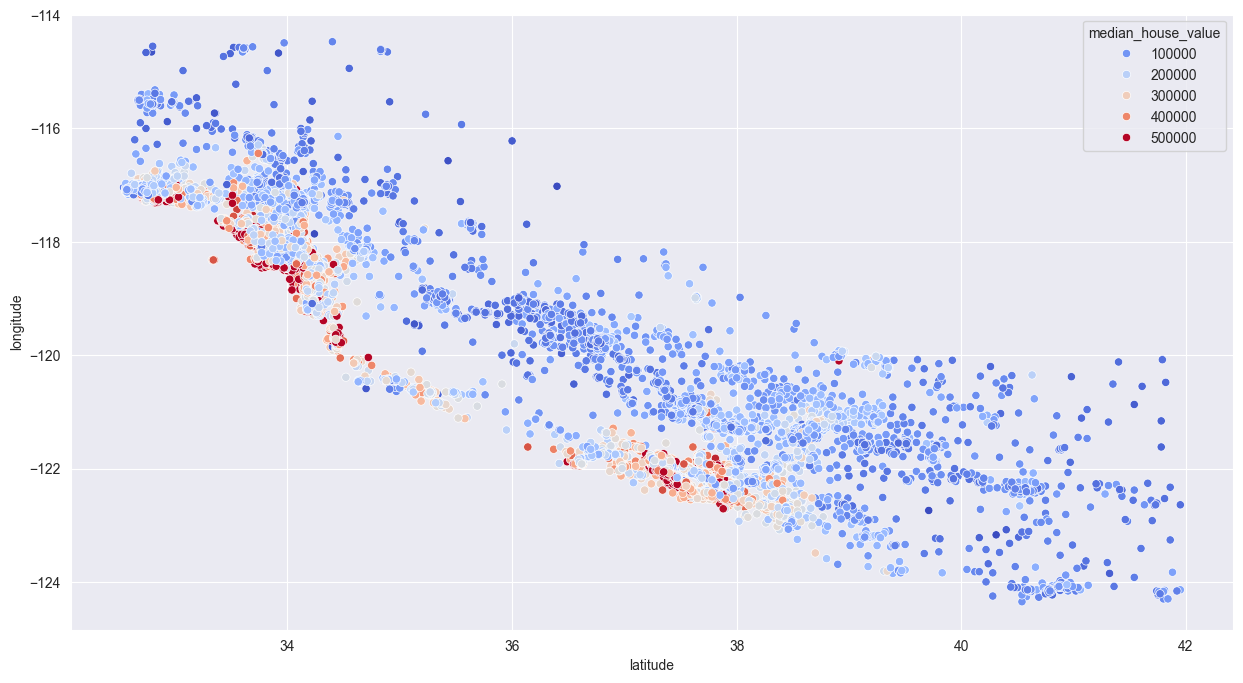

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=numeric_data, hue='median_house_value', palette='coolwarm')

In [61]:
numeric_data['bedroom_ratio'] = numeric_data['total_bedrooms']/numeric_data['total_rooms']
numeric_data['household_rooms'] = numeric_data['total_rooms']/numeric_data['households']

<Axes: >

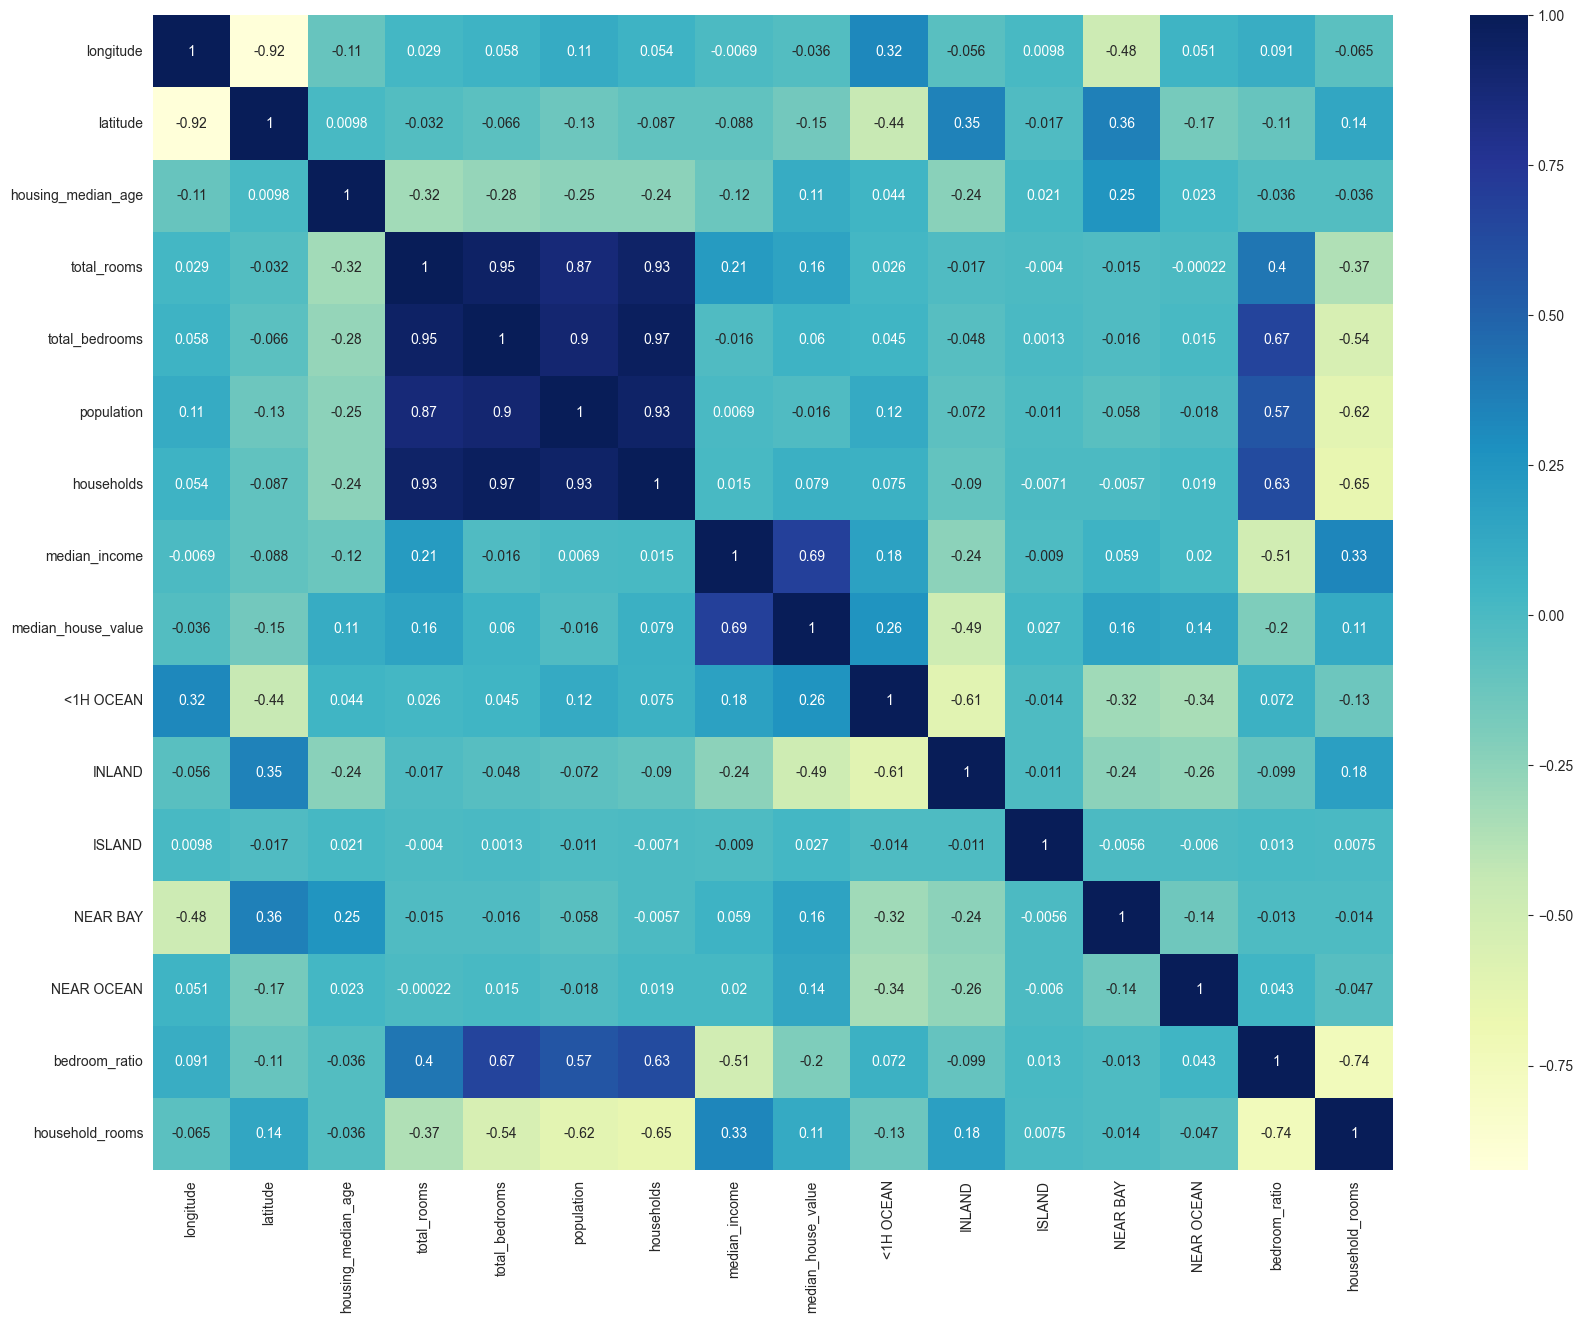

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = numeric_data.drop(['median_house_value'], axis=1), numeric_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_s, y_train)

LinearRegression()

In [65]:
test_data = x_test.join(y_test)
numeric_test_data = test_data.select_dtypes(include='number')

numeric_test_data['total_rooms'] = np.log(numeric_test_data['total_rooms']+1)
numeric_test_data['total_bedrooms'] = np.log(numeric_test_data['total_bedrooms']+1)
numeric_test_data['population'] = np.log(numeric_test_data['population']+1)
numeric_test_data['households'] = np.log(numeric_test_data['households']+1)

numeric_test_data = numeric_test_data.join(pd.get_dummies(test_data['ocean_proximity']))

numeric_test_data['bedroom_ratio'] = numeric_test_data['total_bedrooms']/numeric_test_data['total_rooms']
numeric_test_data['household_rooms'] = numeric_test_data['total_rooms']/numeric_test_data['households']

In [66]:
x_test, y_test = numeric_test_data.drop(['median_house_value'], axis=1), numeric_test_data['median_house_value']

In [71]:
x_test_s = scaler.transform(x_test)

In [72]:
model.score(x_test_s, y_test)

0.6709445294967511

In [73]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train_s, y_train)

RandomForestRegressor()

In [74]:
model.score(x_test_s, y_test)

0.8169663185217403

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
parameters = {
    'n_estimators':[100, 200, 300],
    'min_samples_split':[2, 4],
    'max_depth':[None, 4, 8],
    }

grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)